#  Bayesian Regression Modeling

## Bayesian Linear Models

In [1]:
songs = read.csv(file='https://assets.datacamp.com/production/repositories/2199/datasets/3c921f85674c92085b3428c303b9364573a8bd4f/datacamp-spotify-data.csv', header=TRUE, sep=",")
head(songs)

track_name,artist_name,album_name,song_age,valence,tempo,popularity,duration_ms
Crazy In Love,Beyoncé,Dangerously In Love,5351,70.1,99.259,72,235933
Naughty Girl,Beyoncé,Dangerously In Love,5351,64.3,99.973,59,208600
Baby Boy,Beyoncé,Dangerously In Love,5351,77.4,91.039,57,244867
Hip Hop Star,Beyoncé,Dangerously In Love,5351,96.8,166.602,39,222533
Be With You,Beyoncé,Dangerously In Love,5351,75.6,74.934,42,260160
"Me, Myself and I",Beyoncé,Dangerously In Love,5351,55.5,83.615,54,301173


In [15]:
lm_model <- lm(popularity ~ song_age, data = songs)

In [16]:
summary(lm_model)


Call:
lm(formula = popularity ~ song_age, data = songs)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.908  -2.064   2.936   7.718  34.627 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 68.6899499  2.2619577  30.367  < 2e-16 ***
song_age    -0.0058526  0.0007327  -7.988 8.52e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.9 on 213 degrees of freedom
Multiple R-squared:  0.2305,	Adjusted R-squared:  0.2269 
F-statistic: 63.81 on 1 and 213 DF,  p-value: 8.516e-14


In [22]:
library(broom)

tidy(lm_model)

term,estimate,std.error,statistic,p.value
(Intercept),68.689949940,2.2619576679,30.367478,2.453475e-79
song_age,-0.005852559,0.0007326845,-7.987829,8.515920e-14


In [23]:
library(rstanarm)

In [24]:
stan_model <- stan_glm( popularity ~ song_age, data = songs)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.115934 seconds (Warm-up)
Chain 1:                0.086617 seconds (Sampling)
Chain 1:              

- sigma: Standard deviation of errors
- mean_PPD: mean of posterior predictive samples
- log-posterior: analogous to a likelihood
- Rhat: a measure of within chain variance compared to across chain variance (if all Rhat values are below 1.1, your model converged)

Frequentist: parameters are fixed, data is random
Bayesian: parameters are random, data is fixed

- Confidence interval: Probability that a range contains the true value
- Credible interval: Probability that the true value is within a range

In [13]:
# Create the 90% credible intervals
posterior_interval(stan_model)

# Create the 95% credible intervals
posterior_interval(stan_model, prob = 0.95)

# Create the 80% credible intervals
posterior_interval(stan_model, prob = 0.8)

,5%,95%
(Intercept),64.90944566,72.286459857
song_age,-0.00701238,-0.004647387
sigma,13.77937466,16.244832625


,2.5%,97.5%
(Intercept),64.309130024,72.918126843
song_age,-0.007251079,-0.004423403
sigma,13.598014333,16.561357900


,10%,90%
(Intercept),65.811464032,71.467963115
song_age,-0.006734192,-0.004915602
sigma,14.015447447,15.933722142


In [17]:
confint(lm_model, parm = "song_age", level = 0.95)

,2.5 %,97.5 %
song_age,-0.0072968,-0.004408318


In [27]:
posterior_interval(stan_model, pars = "song_age", prob = 0.95)


,2.5%,97.5%
song_age,-0.00733565,-0.004435949


In [45]:
library(tidybayes)
posterior <- spread_draws(stan_model, song_age) 
head(posterior)

.chain,.iteration,.draw,song_age
1,1,1,-0.005507485
1,2,2,-0.005840376
1,3,3,-0.006025775
1,4,4,-0.005854637
1,5,5,-0.006251025
1,6,6,-0.005607302


In [46]:
library(dplyr)

In [47]:
mean(between(posterior$song_age, -0.006, -0.005))

[1] 0.44875

## Modifying a Bayesian Model

Posterior Distributions
- Posterior distributions sampled in groups called chains
- Each sample in a chain is an iteration

- Fewer iterations = shorter estimation time
- Not enough iteration = convergence problems

In [48]:
summary(stan_model)


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      popularity ~ song_age
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 215
 predictors:   2

Estimates:
                mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)     68.7    2.3   64.2   67.2   68.7   70.2   73.2 
song_age         0.0    0.0    0.0    0.0    0.0    0.0    0.0 
sigma           15.0    0.7   13.7   14.4   14.9   15.4   16.4 
mean_PPD        52.6    1.4   49.8   51.6   52.5   53.5   55.4 
log-posterior -894.4    1.2 -897.6 -895.0 -894.2 -893.6 -893.1 

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.0  1.0  4008 
song_age      0.0  1.0  3611 
sigma         0.0  1.0  3778 
mean_PPD      0.0  1.0  4043 
log-posterior 0.0  1.0  1719 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduction facto

In [49]:
# 3 chains, 1000 iterations, 500 warmup
model_3chains <- stan_glm(popularity ~ song_age, data = songs,
    chains = 3, iter = 1000, warmup = 500)

# Print a summary of model_3chains
summary(model_3chains)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.081833 seconds (Warm-up)
Chain 1:                0.050379 seconds (Sampling)
Chain 1:                0.132212 


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      popularity ~ song_age
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       1500 (posterior sample size)
 observations: 215
 predictors:   2

Estimates:
                mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)     68.8    2.2   64.5   67.4   68.8   70.3   72.9 
song_age         0.0    0.0    0.0    0.0    0.0    0.0    0.0 
sigma           14.9    0.7   13.6   14.4   14.9   15.4   16.5 
mean_PPD        52.5    1.5   49.8   51.5   52.5   53.5   55.4 
log-posterior -894.4    1.2 -897.3 -895.0 -894.1 -893.6 -893.1 

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.1  1.0  1464 
song_age      0.0  1.0  1474 
sigma         0.0  1.0  1407 
mean_PPD      0.0  1.0  1443 
log-posterior 0.0  1.0   706 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduction facto

In [50]:
# 2 chains, 100 iterations, 50 warmup
model_2chains <- stan_glm(popularity ~ song_age, data = songs,
   chains = 2, iter = 100, warmup = 50)

# Print a summary of model_2chains
summary(model_2chains)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: WARNING: There aren't enough warmup iterations to fit the
Chain 1:          three stages of adaptation as currently configured.
Chain 1:          Reducing each adaptation stage to 15%/75%/10% of
Chain 1:          the given number of warmup iterations:
Chain 1:            init_buffer = 7
Chain 1:            adapt_window = 38
Chain 1:            term_buffer = 5
Chain 1: 
Chain 1: Iteration:  1 / 100 [  1%]  (Warmup)
Chain 1: Iteration: 10 / 100 [ 10%]  (Warmup)
Chain 1: Iteration: 20 / 100 [ 20%]  (Warmup)
Chain 1: Iteration: 30 / 100 [ 30%]  (Warmup)
Chain 1: Iteration: 40 / 100 [ 40%]  (Warmup)
Chain 1: Iteration: 50 / 100 [ 50%]  (Warmup)
Chain 1: Iteration: 51 / 100 [ 51%]  (Sampling)
Chain 1: Iteration: 60 / 100 [

Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”Warning message:
“Examine the pairs() plot to diagnose sampling problems
”Warning message:
“Markov chains did not converge! Do not analyze results!”


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      popularity ~ song_age
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       100 (posterior sample size)
 observations: 215
 predictors:   2

Estimates:
                mean   sd     2.5%   25%    50%    75%    97.5%
(Intercept)     63.3    7.3   51.0   56.9   65.7   69.1   73.3 
song_age         0.0    0.0    0.0    0.0    0.0    0.0    0.0 
sigma           17.1    3.2   14.0   14.8   15.5   19.8   24.8 
mean_PPD        46.9    7.1   34.0   39.1   50.4   52.5   55.7 
log-posterior -920.9   34.0 -990.8 -958.4 -896.4 -894.3 -893.2 

Diagnostics:
              mcse Rhat n_eff
(Intercept)    6.3  2.8  1   
song_age       0.0  1.0 87   
sigma          2.3  2.3  2   
mean_PPD       6.1  3.0  1   
log-posterior 25.6  2.8  2   

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is the potential scale reduction factor

In [55]:
library(rstan)

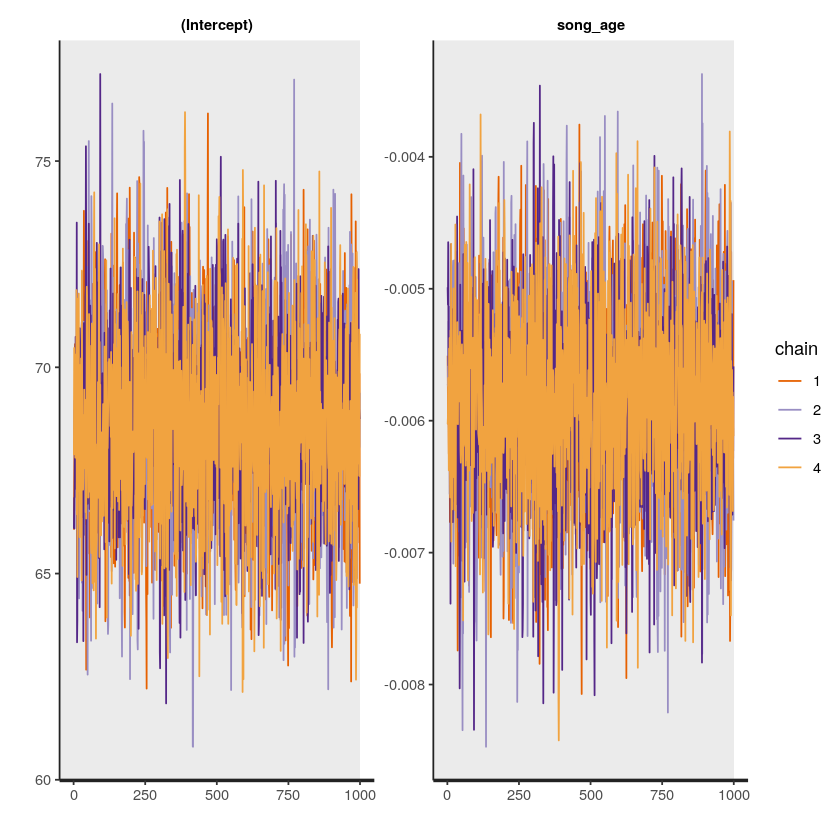

In [61]:
stan_trace(stan_model, inc_warmup = TRUE) 

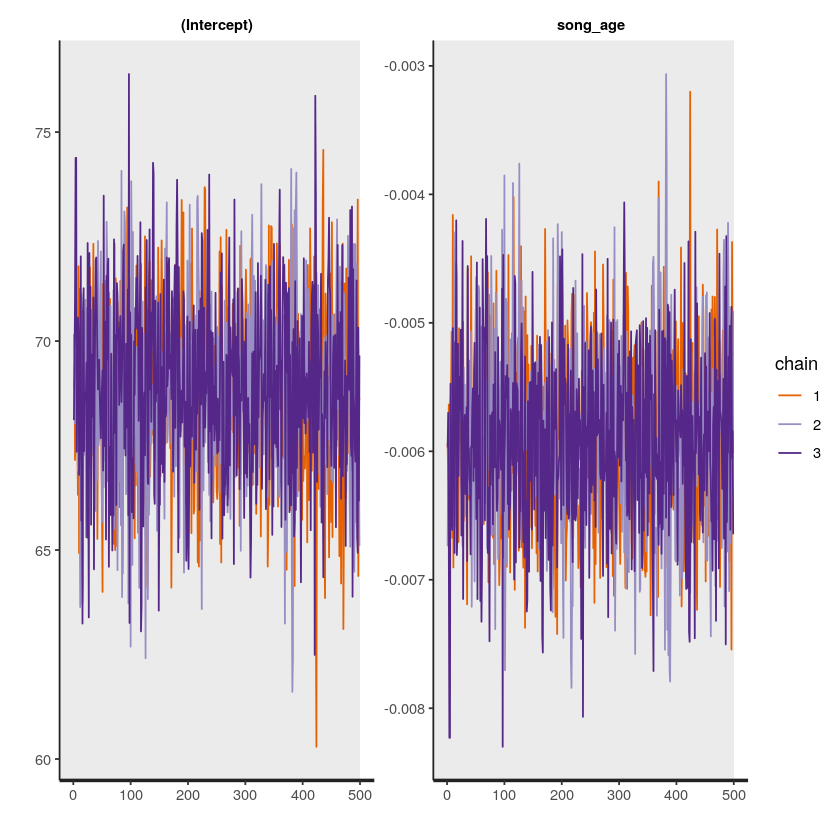

In [60]:
stan_trace(model_3chains, inc_warmup = TRUE) 

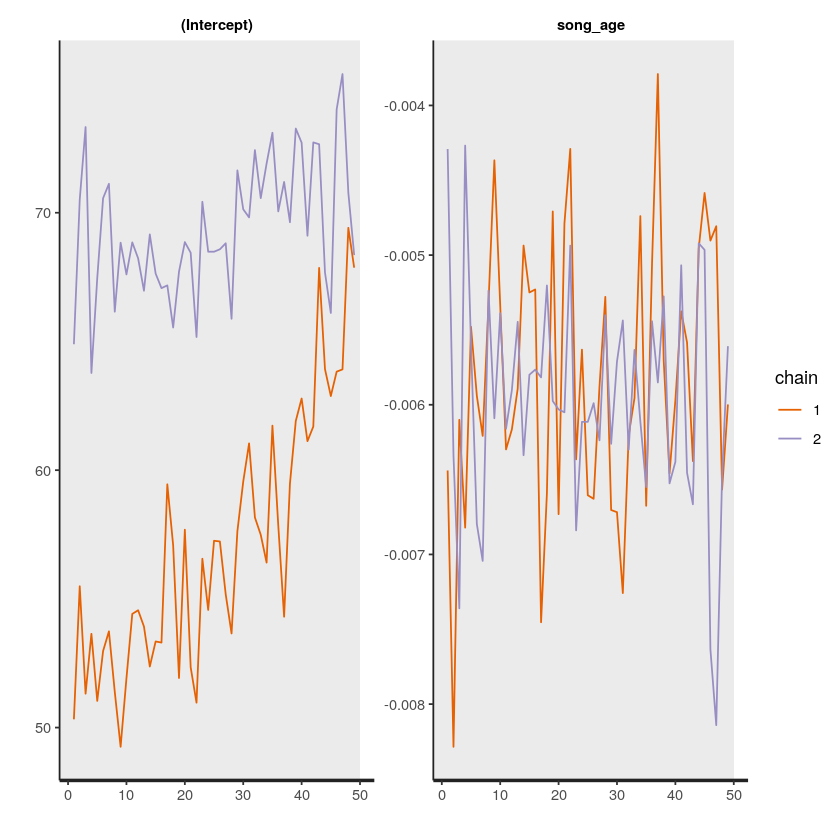

In [58]:
stan_trace(model_2chains, inc_warmup = TRUE) 

In [63]:
prior_summary(stan_model)

Priors for model 'stan_model' 
------
Intercept (after predictors centered)
 ~ normal(location = 0, scale = 10)
     **adjusted scale = 169.51

Coefficients
 ~ normal(location = 0, scale = 2.5)
     **adjusted scale = 0.03

Auxiliary (sigma)
 ~ exponential(rate = 1)
     **adjusted scale = 16.95 (adjusted rate = 1/adjusted scale)
------
See help('prior_summary.stanreg') for more details

Calculating Adjusted Scales
- Intercept: $ 10 * sd(y) $
- Coefficients: $ \frac{2.5}{sd(x)} * sd(y) $

In [66]:
10 * sd(songs$popularity)

[1] 169.5062

In [67]:
2.5 / sd(songs$song_age) * sd(songs$popularity)

[1] 0.03047504

In [68]:
no_scale = stan_glm( popularity ~ song_age, data = songs,
  prior_intercept = normal(autoscale = FALSE),
  prior = normal(autoscale = FALSE),
  prior_aux = exponential(autoscale = FALSE)
)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.577596 seconds (Warm-up)
Chain 1:                0.489565 seconds (Sampling)
Chain 1:              

In [69]:
prior_summary(no_scale)

Priors for model 'no_scale' 
------
Intercept (after predictors centered)
 ~ normal(location = 0, scale = 10)

Coefficients
 ~ normal(location = 0, scale = 2.5)

Auxiliary (sigma)
 ~ exponential(rate = 1)
------
See help('prior_summary.stanreg') for more details

Why change the default prior?
- Good reason to believe the parameter will take a given value
- Contraints on parameter

In [82]:
head(kidiq)

kid_score,mom_hs,mom_iq,mom_age
65,1,121.11753,27
98,1,89.36188,25
85,1,115.44316,27
83,1,99.44964,25
115,1,92.74571,27
98,0,107.90184,18


In [70]:
stan_model_spec <- stan_glm(kid_score ~ mom_iq, data = kidiq,
  prior_intercept = normal(location = 0, scale = 10),
  prior = normal(location = 0, scale = 2.5),
  prior_aux = exponential(rate = 1)
) 


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.190459 seconds (Warm-up)
Chain 1:                0.174491 seconds (Sampling)
Chain 1:              

In [71]:
summary(stan_model_spec)


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      kid_score ~ mom_iq
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 434
 predictors:   2

Estimates:
                mean    sd      2.5%    25%     50%     75%     97.5%
(Intercept)      25.8     5.8    14.3    22.0    25.9    29.6    37.1
mom_iq            0.6     0.1     0.5     0.6     0.6     0.6     0.7
sigma            18.3     0.6    17.2    17.9    18.3    18.7    19.5
mean_PPD         86.8     1.2    84.4    86.0    86.8    87.6    89.2
log-posterior -1885.3     1.2 -1888.2 -1885.9 -1885.0 -1884.5 -1884.0

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.1  1.0  4402 
mom_iq        0.0  1.0  4339 
sigma         0.0  1.0  3836 
mean_PPD      0.0  1.0  3944 
log-posterior 0.0  1.0  1739 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is th

In [75]:
stan_model_notadjusted <- stan_glm(kid_score ~ mom_iq, data = kidiq,
  prior_intercept = normal(location = 0, scale = 10, autoscale = FALSE),
  prior = normal(location = 0, scale = 2.5, autoscale = FALSE),
  prior_aux = exponential(rate = 1, autoscale = FALSE)
)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.9e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.180651 seconds (Warm-up)
Chain 1:                0.171275 seconds (Sampling)
Chain 1:              

In [76]:
summary(stan_model_notadjusted)


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      kid_score ~ mom_iq
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 434
 predictors:   2

Estimates:
                mean    sd      2.5%    25%     50%     75%     97.5%
(Intercept)      25.3     5.7    14.2    21.5    25.2    29.2    36.2
mom_iq            0.6     0.1     0.5     0.6     0.6     0.6     0.7
sigma            18.0     0.6    16.9    17.5    17.9    18.3    19.2
mean_PPD         86.1     1.2    83.9    85.3    86.1    87.0    88.5
log-posterior -1933.8     1.2 -1937.0 -1934.4 -1933.5 -1932.9 -1932.4

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.1  1.0  4087 
mom_iq        0.0  1.0  4123 
sigma         0.0  1.0  3990 
mean_PPD      0.0  1.0  4029 
log-posterior 0.0  1.0  1810 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is th

In [77]:
stan_model_cauchy <- stan_glm(kid_score ~ mom_iq, data = kidiq,
  prior_intercept = normal(location = 3, scale = 2),
  prior = cauchy(location = 0, scale = 1),
)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.187149 seconds (Warm-up)
Chain 1:                0.168937 seconds (Sampling)
Chain 1:              

In [78]:
summary(stan_model_cauchy)


Model Info:

 function:     stan_glm
 family:       gaussian [identity]
 formula:      kid_score ~ mom_iq
 algorithm:    sampling
 priors:       see help('prior_summary')
 sample:       4000 (posterior sample size)
 observations: 434
 predictors:   2

Estimates:
                mean    sd      2.5%    25%     50%     75%     97.5%
(Intercept)      25.9     6.0    14.0    22.0    25.7    30.0    37.7
mom_iq            0.6     0.1     0.5     0.6     0.6     0.6     0.7
sigma            18.3     0.6    17.1    17.9    18.3    18.7    19.5
mean_PPD         86.8     1.3    84.3    85.9    86.7    87.6    89.3
log-posterior -1885.9     1.2 -1889.0 -1886.5 -1885.5 -1884.9 -1884.4

Diagnostics:
              mcse Rhat n_eff
(Intercept)   0.1  1.0  4620 
mom_iq        0.0  1.0  4606 
sigma         0.0  1.0  4098 
mean_PPD      0.0  1.0  3831 
log-posterior 0.0  1.0  2087 

For each parameter, mcse is Monte Carlo standard error, n_eff is a crude measure of effective sample size, and Rhat is th

Many different priors
- normal()
- exponential()
- student_t()
- cauchy()
- ``?priors``

Non-informative (flat priors) - rarely used, for lm better use adj normal distribution

In [79]:
stan_model_flat <- stan_glm(kid_score ~ mom_iq, data = kidiq,
  prior_intercept = NULL,
  prior = NULL,
  prior_aux = NULL
)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 3.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.183896 seconds (Warm-up)
Chain 1:                0.160546 seconds (Sampling)
Chain 1:              

In [80]:
prior_summary(stan_model_flat)

Priors for model 'stan_model_flat' 
------
Intercept (after predictors centered)
 ~ flat

Coefficients
 ~ flat

Auxiliary (sigma)
 ~ flat
------
See help('prior_summary.stanreg') for more details

## Assessing Model Fit

## Bayesian Regression